# Data Extraction (Part II)
## _Processing local and remote data_
Author: _Eduard Valera Zorita (Emeritus Institute of Management)_

___

### Contents:

1. Working with files
   - Opening/closing files
   - Reading files
   - Writing files
   
   
2. Working with formatted files
   - XML files
   - JSON files
   
   
3. Processing API data
   - Read API documentation
   - Data requests
   - Data analysis

___

## 1. Working with files
### 1.1. Opening/Closing files

#### 1.1.1. File paths
> A string that describes the location of a file/folder in the hard drive.

- Windows format

> `C:\Users\Eduard\Webinars\data_extraction_ii`


- UNIX (MacOS/Linux) format

> `/home/ezorita/Emeritus/Webinars/data_extraction_ii`


![picture](images/folder.png)

#### 1.1.2. Absolute and Relative paths

- **Absolute** path

> *Describes the absolute location of a file (from the file system root):*
>
> Windows: `C:\Users\Eduard\Notebooks\python_exercises.ipynb`
>
> Mac/Linux: `/home/ezorita/notebooks/python_exercises.ipynb`

- **Relative** path

> *Describes the relative location of a file (from the current working directory):*
>
> Windows: `webinars\notebooks\data_extraction_ii.ipynb`
>
> Mac/Linux: `webinars/notebooks/data_exctraction_ii.ipynb`

#### 1.1.3. Relative to what?
> **Working directory**: The path where Python is being executed.

In [1]:
import os
os.getcwd()

'/home/ezorita/Emeritus/Webinars/data_extraction_ii'

#### 1.1.4. Absolute or relative?
>**Always use relative paths**. Especially if you are planning to share your code or run it from different computers.

#### 1.1.5. Opening a file
- Function `open(path, mode)`

> where `path` is a path (relative or absolute) to the file.

> Returns a `file` object.

- Example: open the file named `file.txt` located in the `data` folder.

![data_folder](images/data_folder.png)

⌨ Open the file with relative path `data/file.txt`:

In [2]:
file = open('data/file.txt','r')

⌨ Close the file:

In [3]:
file.close()

#### 1.1.6. File opening modes
![file_modes](images/open_modes.png)

#### 1.1.7. Code structure
Working with files consists of three steps:
1. Open the file
2. Read and/or write
3. Close the file

Manual handling:
```Python
file = open('somefile.txt', 'r+')
# Do some file operations
# ...
# End of file operations
file.close()
# File is not accessible beyond this point
# ...
```

Using `with` blocks:
```Python
with open('somefile.txt', 'r+') as file:
    # Do some file operations
    # ...
    # End of file operations
# File is not accessible beyond this point (indentation break)
# ...
```

### 1.2. Reading files

#### 1.2.1. Read whole file content
- Function `file.read()`

> `file` must be a valid File object, obtained from a call to `open()`.

> Returns a String with the whole content.

> ⛔ Some files may be too big to be read at once!



⌨ Read the content of the file `data/file.txt`:

In [4]:
with open('data/file.txt','r') as file:
    content = file.read()
    
# The file is closed now.
print(content)

line one
line two
line three
line four
line five



#### 1.2.2. Read line by line
- Function `file.readline()`

> `file` must be a valid File object, obtained from a call to `open()`.

> Returns the next line in a String.

> ✅ Preferred for big files that can be processed line by line.



⌨ Read the first two lines of `data/file.txt`:

In [5]:
with open('data/file.txt','r') as file:
    line_one = file.readline()
    line_two = file.readline()
    
# The file is closed now.
print(line_one)
print(line_two)

line one

line two



- Iteration of `file` objects

> Returns one line per iteration.

⌨ Read all lines of `data/file.txt` using a `for` loop:

In [6]:
with open('data/file.txt','r') as file:
    for line in file:
        print(line, end='')
    

line one
line two
line three
line four
line five


### 1.3. Writing files

#### 1.3.1. Writing strings to files
- Function `file.write(text)`

> `file` must be a valid File object, obtained from a call to `open()`.

> Writes the String `text` to the `file`.

> Returns the number of bytes written.

> ⚠ The content may not be written until the file is closed!

⌨ Write `Hello world!` to `data/hello.txt`:

In [7]:
file = open('data/hello.txt','w')
file.write('Hello world!')

12

In [8]:
file.close()

⌨ Write three lines `line 1`, `line 2` and `line 3` to `data/lines.txt`:
> Use three `write` calls, terminate the strings with `\n` to break the lines

In [9]:
with open('data/lines.txt','w') as file:
    file.write('line 1\n')
    file.write('line 2\n')
    file.write('line 3\n')

___

## 2. Working with formatted files
> Reading or writing XML/JSON files reduces to reading a file that contains a XML/JSON string.

> Once the XML/JSON information is in a String, pass it to a parser to extract the information.

> XML/JSON Strings can be written to files to create XML/JSON files.

### 2.1. XML files
#### 2.1.1. Read XML files
- Read the file using `file.read()`
- Parse the information with `etree.XML(xml_string)`

> Import `etree` from the `lxml` library using `from lxml import etree`

> `xml_string` must be a String with a valid `XML` format

In [10]:
from lxml import etree

⌨ Read the XML file `data/file.xml`, store the contents in `xml_string`:

In [11]:
with open('data/file.xml', 'r') as file:
    xml_string = file.read()

⌨ Print `xml_string`:

In [12]:
print(xml_string)

<data>
  <user>
    <name>
      <first>Eduard</first>
      <last>Zorita</last>
    </name>
    <course>PGDDS</course>
    <year>2019</year>
  </user>
  <user>
    <name>
      <first>Mike</first>
      <last>Smith</last>
    </name>
    <course>AI</course>
    <year>2018</year>
  </user>
</data>



⌨ Parse `xml_string` using `etree.XML()`, store in `root`:

In [13]:
root = etree.XML(xml_string)

#### 2.1.2. Write XML files
- Convert the `XML` object to a String using `etree.to_string(object, encoding='utf-8')`

> Object must be a valid `etree` object, obtained with a call to `etree.XML()`.

> Returns a binary string.

- Write the string to a file using `file.write()`

⌨ Convert `root` to a string, store the result in `root_string`:

In [14]:
root_string = etree.tostring(root, encoding='utf-8')

⌨ Check the `type` of `root_string`:

In [15]:
type(root_string)

bytes

⌨ Decode and print `root_string`:

In [16]:
print(root_string.decode())

<data>
  <user>
    <name>
      <first>Eduard</first>
      <last>Zorita</last>
    </name>
    <course>PGDDS</course>
    <year>2019</year>
  </user>
  <user>
    <name>
      <first>Mike</first>
      <last>Smith</last>
    </name>
    <course>AI</course>
    <year>2018</year>
  </user>
</data>


⌨ Write `root_string` to `data/output.xml`:

In [17]:
with open('data/output.xml','wb') as file:
    file.write(root_string)

### 2.2. JSON files
#### 2.2.1. Read JSON files
**Option 1:**
- Read JSON file using `file.read()`
- Parse JSON string with `json.loads(json_string)`

> `json_string` must be a String with a valid `JSON` format


**Option 2:**
- Read and parse the file with `json.load(file)`

> Where `file` is a File object.

In [18]:
import json

⌨ Read the file `data/file.json` using `json.load()`, store the result to `json_object`:

In [19]:
with open('data/file.json','r') as file:
    json_object = json.load(file)

⌨ Check the type of `json_object`:

In [20]:
type(json_object)

list

⌨ Print `json_object`:

In [21]:
print(json_object)

[{'name': {'first': 'Eduard', 'last': 'Zorita'}, 'course': 'PGDDS', 'year': 2019}, {'name': {'first': 'Mike', 'last': 'Smith'}, 'course': 'AI', 'year': 2018}]


#### 2.2.2. Write Python Objects to JSON files
**Option 1:**

- Convert the Object to a JSON string with `json.dumps(object)`
- Write the String to a file using `file.write(json_string)`

**Option 2:**

- Write the file directly using `json.dump(object, file)`

> Where `file` is a File object.

📄 Python object:

In [22]:
webinars = [{
    'title': 'Data Extraction Part I',
    'lecturer': 'Eduard Valera Zorita',
    'language': 'Python',
    'platform': 'Zoom',
    'date': '2019/05/08',
    'hour': '2:30pm UTC'
},
{
    'title': 'Data Extraction Part II',
    'lecturer': 'Eduard Valera Zorita',
    'language': 'Python',
    'platform': 'Zoom',
    'date': '2019/05/15',
    'hour': '2:30pm UTC'
}]

⌨ Check the `type` of `webinars`:

In [23]:
type(webinars)

list

⌨ Check the `type` of `webinars[0]`:

In [24]:
type(webinars[0])

dict

⌨ Write the object as JSON to `data/webinars.json` using `json.dump()`:

In [25]:
with open('data/webinars.json','w') as file:
    json.dump(webinars, file)

___

## 3. Processing API data

### 3.1. Read API documentation

> All APIs are different because they expose data of different nature. 

📄 Read the API Documentation and identify the following information:
- Base URL
- Endpoints and parameters
- API request limits
- Is authentication required?

In the example below the API interface is very simple. However, [some other APIs](https://developers.google.com/maps/documentation/maps-static/dev-guide) have much more complex interfaces that require weeks to master.

### * Exchange rates API (https://exchangeratesapi.io/)

Check the [API documentation](https://github.com/exchangeratesapi/exchangeratesapi#exchange-rates-api).

#### Base URL:
All the requests to an API usually share the same base URL, in this case:
```
https://api.exchangeratesapi.io/
```
#### Endpoints:
This API has 3 endpoints that characterize three kinds of requests:

- `GET /latest`
> Returns the latest exchange rate. 

- `GET /YYYY-MM-DD`
> Returns the exchange rate for a specific date.

- `GET /history`
> Returns the historical rates for a time period (since 1999). Parameters: `start_at=YYYY-MM-DD` and `end_at=YYYY-MM-DD`.

#### Optional parameters for all endpoints:
- `base=[currency]`
>The base currency for which the exchange rate is requested. Default is `EUR`.

- `symbol=[currency1,currency2,...]`
> Request exchange rates for specific currencies. Returns all currencies by default.

### 3.2. Data requests

In [26]:
import requests

In [27]:
API_URL = 'https://api.exchangeratesapi.io'

#### 3.2.1. Current exchange rates

⌨ Request the current exchange rates relative to EUR, store the response in `response_current`:
> Use the API endpoint `/latest`

In [28]:
response_current = requests.get(API_URL+'/latest')

⌨ Decode the response content, store it in `text_current`:

In [29]:
text_current = response_current.content.decode()
print(text_current)

{"base":"EUR","rates":{"BGN":1.9558,"NZD":1.7056,"ILS":4.0147,"RUB":73.2104,"CAD":1.5117,"USD":1.1226,"PHP":58.898,"CHF":1.1307,"ZAR":15.9746,"AUD":1.6162,"JPY":123.0,"TRY":6.7732,"HKD":8.8112,"MYR":4.6818,"THB":35.362,"HRK":7.4113,"NOK":9.799,"IDR":16199.12,"DKK":7.4691,"CZK":25.751,"HUF":324.23,"GBP":0.86723,"MXN":21.5178,"KRW":1333.2,"ISK":137.8,"SGD":1.5366,"BRL":4.4743,"PLN":4.3061,"INR":79.0375,"RON":4.7615,"CNY":7.7252,"SEK":10.779},"date":"2019-05-14"}


⌨ Parse `text_current` using the `JSON` parser, assign to `current_rates`:

In [30]:
current_rates = json.loads(text_current)
print(current_rates)

{'base': 'EUR', 'rates': {'BGN': 1.9558, 'NZD': 1.7056, 'ILS': 4.0147, 'RUB': 73.2104, 'CAD': 1.5117, 'USD': 1.1226, 'PHP': 58.898, 'CHF': 1.1307, 'ZAR': 15.9746, 'AUD': 1.6162, 'JPY': 123.0, 'TRY': 6.7732, 'HKD': 8.8112, 'MYR': 4.6818, 'THB': 35.362, 'HRK': 7.4113, 'NOK': 9.799, 'IDR': 16199.12, 'DKK': 7.4691, 'CZK': 25.751, 'HUF': 324.23, 'GBP': 0.86723, 'MXN': 21.5178, 'KRW': 1333.2, 'ISK': 137.8, 'SGD': 1.5366, 'BRL': 4.4743, 'PLN': 4.3061, 'INR': 79.0375, 'RON': 4.7615, 'CNY': 7.7252, 'SEK': 10.779}, 'date': '2019-05-14'}


⌨ Request how many `GBP` and `USD` are worth one `EUR` today, assign to `eur_rates`:
> Use `response.json()` to parse the response object to `JSON` in one step.

> Use the API parameter: `symbols=`

In [31]:
eur_rates = requests.get(API_URL+'/latest?symbols=GBP,USD').json()
print(eur_rates)

{'base': 'EUR', 'rates': {'USD': 1.1226, 'GBP': 0.86723}, 'date': '2019-05-14'}


⌨ Get how many `CHF` is worth one `USD` today, assign to `usd_rates`:
> Use the API parameters: `base=` and `symbols=`

In [32]:
usd_rates = requests.get(API_URL+'/latest?base=USD&symbols=CHF').json()
print(usd_rates)
print(usd_rates['rates']['CHF'])

{'base': 'USD', 'rates': {'CHF': 1.0072153928}, 'date': '2019-05-14'}
1.0072153928


#### 3.2.2. Historical exchange rates

⌨ Request the `CAD` exchange rates on the `4th of January 2001`, assign to `cad_hist`:
> Use the API endpoint: `/YYYY-MM-DD`

In [33]:
cad_hist = requests.get(API_URL+'/2001-01-04?base=CAD').json()
print(cad_hist)

{'base': 'CAD', 'rates': {'BGN': 1.3829290715, 'NZD': 1.5034297433, 'TRL': 446170.7092850577, 'CAD': 1.0, 'USD': 0.6688353016, 'CHF': 1.0760907998, 'SKK': 30.9723499045, 'AUD': 1.1848525564, 'JPY': 76.5504561205, 'HKD': 5.2167456333, 'CZK': 24.8638710134, 'SEK': 6.3045753483, 'CYP': 0.4071918535, 'LVL': 0.4116399123, 'DKK': 5.2771374019, 'NOK': 5.8489498621, 'HUF': 187.2356976169, 'GBP': 0.4473516724, 'LTL': 2.67604837, 'KRW': 841.9277278835, 'ROL': 17376.4231666785, 'ISK': 56.4316526413, 'ZAR': 5.021214907, 'SGD': 1.1589703698, 'PLN': 2.7560992858, 'SIT': 150.9751078424, 'EEK': 11.0647054664, 'EUR': 0.7071635669, 'MTL': 0.2902199279}, 'date': '2001-01-04'}


⌨ Get all the `EUR` to `USD` exchange rates for the month of January 2019, assign to `eur_hist`:
> Use the API endpoint: `/history`

> Use the API parameters: `start_at=` and `end_at=`

In [34]:
eur_hist = requests.get(API_URL+'/history?start_at=2019-01-01&end_at=2019-01-31&symbols=USD').json()
print(eur_hist)

{'base': 'EUR', 'rates': {'2019-01-14': {'USD': 1.1467}, '2019-01-10': {'USD': 1.1535}, '2019-01-17': {'USD': 1.1396}, '2019-01-04': {'USD': 1.1403}, '2019-01-25': {'USD': 1.1346}, '2019-01-15': {'USD': 1.1424}, '2019-01-18': {'USD': 1.1402}, '2019-01-22': {'USD': 1.1354}, '2019-01-09': {'USD': 1.1455}, '2019-01-31': {'USD': 1.1488}, '2019-01-21': {'USD': 1.1362}, '2019-01-29': {'USD': 1.1422}, '2019-01-23': {'USD': 1.1367}, '2019-01-11': {'USD': 1.1533}, '2019-01-02': {'USD': 1.1397}, '2019-01-03': {'USD': 1.1348}, '2019-01-07': {'USD': 1.1445}, '2019-01-08': {'USD': 1.144}, '2019-01-28': {'USD': 1.1418}, '2019-01-24': {'USD': 1.1341}, '2019-01-16': {'USD': 1.1389}, '2019-01-30': {'USD': 1.1429}}, 'end_at': '2019-01-31', 'start_at': '2019-01-01'}


**Note:** the repsonse is not sorted by date.

### 3.3. Data analysis


#### 3.3.1. Historical maximum
⌨ Define a function that returns the date of the historical maximum conversion rate between two currencies.

> The prototype function is as follows:

```Python
def max_rate(currency_a, currency_b, start_date, end_date):
```
> The function must return a **tuple** with the **date** and the **maximum exchange rate**.

In [35]:
def max_rate(currency_a, currency_b, start_date, end_date):
    # Request historical data
    request_url = API_URL+'/history?start_at='+start_date+'&end_at='+end_date+'&base='+currency_a+'&symbols='+currency_b
    rate_hist = requests.get(request_url).json()
    # Iterate over date dictionary, store max rate and date
    max_rate = -1
    max_date = ''
    for date in rate_hist['rates']:
        rate = rate_hist['rates'][date][currency_b]
        if rate > max_rate:
            max_rate = rate
            max_date = date
    # Return max rate and date
    return (max_date, max_rate)

⌨ Find the maximum `EUR` to `USD` conversion of 2018:
> Result: `EUR` to `USD` rate was `1.2493` on February 15, 2018

In [36]:
max_rate('EUR', 'USD', '2018-01-01', '2018-12-31')

('2018-02-15', 1.2493)

#### 3.3.2. Exchange rate visualization
⌨ Define a function that returns a list of historical exchange rates sorted by date.
> The prototype function is as follows:
```Python
def rate_list(currency_a, currency_b, start_date, end_date)
```
> The function must return a **list of floats sorted by date**.

In [37]:
def rate_list(currency_a, currency_b, start_date, end_date):
    # Request historical data
    request_url = API_URL+'/history?start_at='+start_date+'&end_at='+end_date+'&base='+currency_a+'&symbols='+currency_b
    rate_hist = requests.get(request_url).json()
    # Get the dates dictionary
    date_dict = rate_hist['rates']
    # The dates are the keys of the dictionary, sort them
    date_keys = sorted(date_dict.keys())
    # Iterate over the date dictionary, store rates in list
    rates = []
    for date in date_keys:
        rates.append(date_dict[date][currency_b])
    return rates

⌨ Get the sorted `EUR` to `USD` rates for 2018.
> Compare with [XE data](https://www.xe.com/currencycharts/?from=EUR&to=USD&view=2Y)

In [38]:
eur_usd_history = rate_list('EUR', 'USD', '2018-01-01', '2018-12-31')

<IPython.core.display.Javascript object>


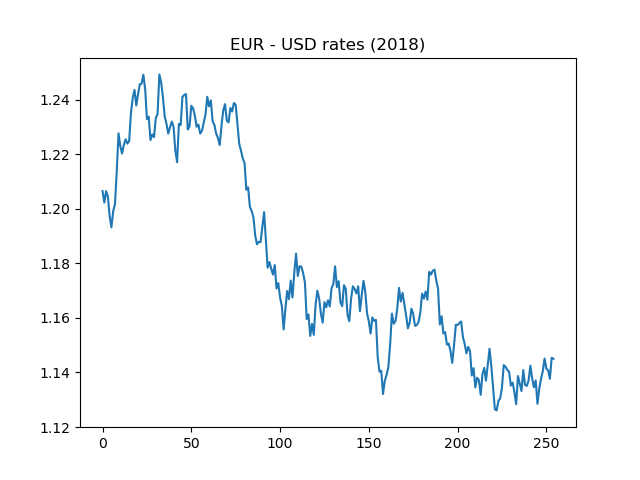

Text(0.5, 1.0, 'EUR - USD rates (2018)')

In [39]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(eur_usd_history)
plt.title('EUR - USD rates (2018)')